In [52]:
from cetsp_bnb2.core._cetsp_bindings import Instance, Circle, Point, TripleMap
from cetsp_bnb2.core import optimize
import typing

In [53]:
instance = Instance(
    [# outer circle
        Circle(Point(0,0), 1), Circle(Point(100, 0), 1), Circle(Point(100, 100), 1), Circle(Point(0, 100), 1),
        # inner circle
     Circle(Point(30, 30), 1), Circle(Point(70, 30), 1), Circle(Point(70, 70), 1), Circle(Point(30, 70), 1),
     Circle(Point(50, 50), 1),
     Circle(Point(30, 50), 1), Circle(Point(50, 30), 1), Circle(Point(70, 50), 1), Circle(Point(50, 70), 1),

     Circle(Point(50, 0), 1), Circle(Point(100, 50), 1), Circle(Point(50, 100), 1), Circle(Point(0, 50), 1),
     ],
)
for i in range(len(instance)):
    print(i, instance[i])

0 Circle((50, 50), 1)
1 Circle((0, 50), 1)
2 Circle((50, 100), 1)
3 Circle((100, 50), 1)
4 Circle((50, 0), 1)
5 Circle((50, 70), 1)
6 Circle((70, 50), 1)
7 Circle((50, 30), 1)
8 Circle((30, 50), 1)
9 Circle((0, 0), 1)
10 Circle((30, 70), 1)
11 Circle((70, 70), 1)
12 Circle((70, 30), 1)
13 Circle((30, 30), 1)
14 Circle((0, 100), 1)
15 Circle((100, 100), 1)
16 Circle((100, 0), 1)


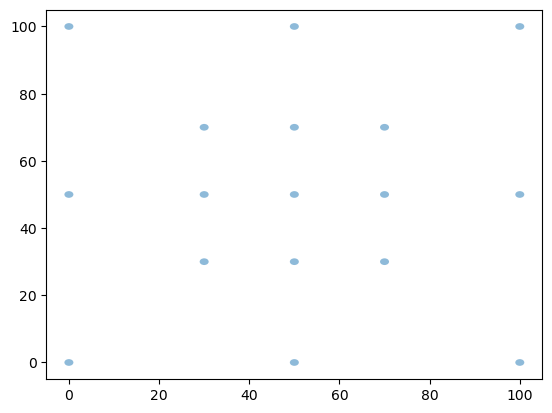

In [60]:
from cetsp_bnb2.core import plot_circle
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
for circle in instance:
    plot_circle(ax, circle, alpha=0.5)
plt.xlim(-5, 105)
plt.ylim(-5, 105)
plt.show()

In [54]:
optimize(Instance([# outer circle
        Circle(Point(0,0), 1), Circle(Point(100, 0), 1), Circle(Point(100, 100), 1), Circle(Point(0, 100), 1),]))

Problem Name: 6a8ff01c86184851bfa97fbc2bfbd5dd
Problem Type: TSP
Number of Nodes: 4
Rounded Euclidean Norm (CC_EUCLIDEAN)
CCtsp_solve_dat ...
Finding a good tour for compression ...
linkern ...
Less than 10 nodes, setting repeatcount to 0
Starting Cycle: 400000
LK Cycle: 400000
Best cycle length: 400000
Lin-Kernighan Running Time: 0.00
LK Initial Run: 400000.0
Less than 10 nodes, setting repeatcount to 0
LK Run 0: 400000.0
Less than 10 nodes, setting repeatcount to 0
LK Run from best tour: 400000.0
Time to find compression tour: 0.00 (seconds)
Set initial upperbound to 400000 (from tour)
Less than 10 nodes, setting repeatcount to 0
Less than 10 nodes, setting repeatcount to 0
Less than 10 nodes, setting repeatcount to 0
Less than 10 nodes, setting repeatcount to 0
Less than 10 nodes, setting repeatcount to 0
Less than 10 nodes, setting repeatcount to 0
Less than 10 nodes, setting repeatcount to 0
Less than 10 nodes, setting repeatcount to 0
Less than 10 nodes, setting repeatcount to 0


ERROR: No dual change in basis finding code
Did not find a basic optimal solution
Fractional matching routine failed
No warmstart, stumbling on anyway
ERROR: No dual change in basis finding code
Did not find a basic optimal solution
Fractional matching routine failed
No warmstart, stumbling on anyway


(<cetsp_bnb2.core._cetsp_bindings.Solution at 0x7f143339c970>,
 394.3431465532004,
 {'num_explored': '0', 'num_branches': '0', 'num_iterations': '1'})

8 threads
Branching on farthest circle.
Using GlobalConvexHullRule
Using DfsBfs search
py_callback 0x7ffc3712b438
Starting with root node of size 4
i	LB	|	UB	|	Time
1	394.343	|	394.343	|	0s
---------------
1	394.343	|	394.343
1 iterations with 0 nodes explored and 0 branches.


In [55]:


sol = optimize(instance)

Problem Name: 96221b8d691a4555b8fbfc47fb7d2706
Problem Type: TSP
Number of Nodes: 17
Rounded Euclidean Norm (CC_EUCLIDEAN)
CCtsp_solve_dat ...
Finding a good tour for compression ...
linkern ...
Starting Cycle: 678168
   0 Steps   Best: 588482   0.00 seconds
   8 Total Steps.
Best cycle length: 588482
Lin-Kernighan Running Time: 0.00
LK Initial Run: 588482.0
LK Run 0: 588482.0
LK Run from best tour: 588482.0
Time to find compression tour: 0.00 (seconds)
Set initial upperbound to 588482 (from tour)
  LP Value  1: 588284.000000  (0.00 seconds)
  LP Value  2: 588482.000000  (0.00 seconds)
New lower bound: 588482.000000
Exact lower bound: 588482.000000
DIFF: 0.000000
Established Bound: 588482
Optimal tour: 588482
Total Time to solve TSP: 0.01
Problem Name: 7a34d45bd1184e1da73515919d12bd2a
Problem Type: TSP
Number of Nodes: 17
Rounded Euclidean Norm (CC_EUCLIDEAN)
CCtsp_solve_dat ...
Finding a good tour for compression ...
linkern ...
Starting Cycle: 613716
   0 Steps   Best: 571169   0.00 

In [56]:
initial_sequence = []
for i, c in enumerate(instance):
    if c.center.x == 0 and c.center.y == 0:
        initial_sequence.append(i)
for i, c in enumerate(instance):
    if c.center.x == 100 and c.center.y == 0:
        initial_sequence.append(i)
for i, c in enumerate(instance):
    if c.center.x == 100 and c.center.y == 100:
        initial_sequence.append(i)
for i,c in enumerate(instance):
    if c.center.x == 0 and c.center.y == 100:
        initial_sequence.append(i)

missing = [i for i in range(len(instance)) if i not in initial_sequence]

In [57]:
import gurobipy as gp  # requires gurobi to be installed via conda.
from gurobipy import GRB

In [58]:
import math
import itertools

class InsertionCostLowerBound:
    def __init__(self, instance) -> None:
        self.instance = instance
        self._triple_map = TripleMap(instance)

    def _min_dist(self, a: Circle, b: Circle):
        return math.sqrt((a.center.x - b.center.x)**2 + (a.center.y - b.center.y)**2) - (a.radius + b.radius)
    
    def _max_dist(self, a: Circle, b: Circle):
        return math.sqrt((a.center.x - b.center.x)**2 + (a.center.y - b.center.y)**2) + (a.radius + b.radius)

    def get_lb_on_insertion_cost(self, inserting: int, between: typing.Tuple[int,int]) -> float:
        """
        Gives a lower bound on how much the tour length will increase if the i-th circle is inserted
        in a tour between two consecutive circles.
        """
        shortest_connection =  2*self._triple_map.get_cost(between[0], inserting, between[1])
        max_direct =  self._max_dist(self.instance[between[0]], self.instance[between[1]])
        lb = max(0, shortest_connection - max_direct)
        print(self.instance[between[0]],self.instance[inserting],self.instance[between[1]])
        print("lb", inserting, between, shortest_connection, max_direct, lb)
        return lb


class _SegmentIntegrationVars:
    def __init__(self, model: gp.Model, segment: typing.Tuple[int, int], cost_lb: InsertionCostLowerBound, missing: typing.List[int]) -> None:
        self._model = model
        self.segment = segment
        self._missing = missing
        self._cost_lb = cost_lb
        self._vars = model.addVars(((v,w) for v,w in itertools.product(missing, missing+[segment[0]]) if v!=w),
                                    vtype=GRB.BINARY, lb=0, ub=1, name="insertion_vars")
        self._model.update()
        self._enforce_flow_conservation()
        self._prohibit_small_loops()
        self._only_one_first()

    def _only_one_first(self):
        self._model.addConstr(
            sum(self.get_var(inserting, self.segment[0]) for inserting in self._missing) <= 1,
            name=f"only_one_first_{self.segment[0]}"
        )

    def get_objective(self):
        return sum(self._cost_lb.get_lb_on_insertion_cost(inserting, (after, self.segment[1]))
                    * self.get_var(inserting=inserting, after=after) for inserting, after in self._vars.keys())

    def _enforce_flow_conservation(self):
        for circle in self._missing:
            self._model.addConstr(
                self.get_insertion_var(circle) >= self.get_successor_var(circle),
                name=f"flow_conservation_{circle}"
            )

    def _prohibit_small_loops(self):
        """
        Prohibit the small loop over a pair of circles, i.e., circle i is inserted after circle j and vice versa.
        This would satisfy flow conservation, but is not a valid tour.
        Larger loops are still possible and need to be prohibited by lazy constraints.
        """
        for a,b in itertools.combinations(self._missing, 2):
            self._model.addConstr(
                self.get_var(inserting=a, after=b) + self.get_var(inserting=b, after=a) <= 1,
                name=f"no_small_loop_{a}_{b}"
            )

    def get_insertion_var(self, circle: int) -> gp.LinExpr:
        """
        Evaluates to one if the circle is inserted into the segment.
        """
        return sum(self.get_var(inserting=circle, after=after) for after in self._missing+[self.segment[0]] if after!=circle)
        
    def get_successor_var(self, circle: int) -> gp.LinExpr:
        """
        Evaluates to one if a further circle is inserted after the given circle.
        """
        return sum(self.get_var(inserting=after, after=circle) for after in self._missing if after!=circle)

    def get_var(self, inserting: int, after: int) -> gp.Var:
        """
        Evaluates to one if the circle is inserted into the segment after the given circle.
        """
        return self._vars[(inserting, after)]
    
    def print_usage(self):
        for v,w in self._vars.keys():
            if self.get_var(v,w).x > 0.1:
                print(f"{v} on {self.segment} after {w} with {self.get_var(v,w).x}")
    


class CircleIntegrationCostModel:
    """
    This class models a simple linear program to lower bound the integration cost of circles
    into a given sequence of circles. This can be used to prune early. It should perform
    well for small circles, for which the branch and bound algorithm struggles because they
    are difficult to cover implicitly. For larger circles, this model is not very tight.
    """
    
    def __init__(self, instance: Instance, tour: typing.List[int], missing: typing.List[int]) -> None:
        self._model = gp.Model()
        self._missing = missing
        self._cost_lb = InsertionCostLowerBound(instance)
        self._segment_integrations = [
            _SegmentIntegrationVars(self._model, (tour[i], tour[(i+1)%len(tour)]), self._cost_lb, missing)
            for i in range(len(tour))
        ]
        self._model.setObjective(sum(segment.get_objective() for segment in self._segment_integrations), GRB.MINIMIZE)
        self._enforce_coverage()

    def _enforce_coverage(self):
        for circle in self._missing:
            self._model.addConstr(
                sum(segment.get_insertion_var(circle) for segment in self._segment_integrations) == 1,
                name=f"coverage_{circle}"
            )

    def optimize(self, timelimit: int = 60):
        self._model.Params.TimeLimit = timelimit
        self._model.optimize()
        for segment in self._segment_integrations:
            segment.print_usage()
        return self._model.getObjective().getValue()
    
opt = CircleIntegrationCostModel(instance, initial_sequence, missing)
opt.optimize()

Circle((0, 50), 1) Circle((50, 50), 1) Circle((100, 0), 1)
lb 0 (1, 16) 117.95997738262162 113.80339887498948 4.156578507632133
Circle((50, 100), 1) Circle((50, 50), 1) Circle((100, 0), 1)
lb 0 (2, 16) 117.95997785594206 113.80339887498948 4.156578980952574
Circle((100, 50), 1) Circle((50, 50), 1) Circle((100, 0), 1)
lb 0 (3, 16) 116.86545917533581 52.0 64.86545917533581
Circle((50, 0), 1) Circle((50, 50), 1) Circle((100, 0), 1)
lb 0 (4, 16) 116.8654589100058 52.0 64.8654589100058
Circle((50, 70), 1) Circle((50, 50), 1) Circle((100, 0), 1)
lb 0 (5, 16) 87.97302017465054 88.02325267042627 0
Circle((70, 50), 1) Circle((50, 50), 1) Circle((100, 0), 1)
lb 0 (6, 16) 86.86775878394872 60.309518948453004 26.558239835495712
Circle((50, 30), 1) Circle((50, 50), 1) Circle((100, 0), 1)
lb 0 (7, 16) 86.86776730669862 60.309518948453004 26.55824835824562
Circle((30, 50), 1) Circle((50, 50), 1) Circle((100, 0), 1)
lb 0 (8, 16) 87.97302197653119 88.02325267042627 0
Circle((30, 70), 1) Circle((50, 50)

133.9787298803413